In [57]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt 
import seaborn as sns

# Extracting the dataset from a spreadsheet

In [58]:
from io import BytesIO
import requests

r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vTS7APsb4qRGPJEe0AbA_Xfkhi8xvL6Y4-oXv6nXaeotmKMPcu0CYs31RrXCgSvI-rELYIskn8buZPv/pub?output=csv')
data = r.content

dataset = pd.read_csv(BytesIO(data))

# Exploratory Data Analysis

In [59]:
dataset.head()

,Model,Engine Type,THR,SHP,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Piston,NaN,145.0,25.250000,10.250000,37.416667,1180.0,2050.0,241.2,104.0,91.0,46.0,13000.0,450.0,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Piston,NaN,85.0,20.583333,8.750000,36.083333,820.0,1350.0,100.5,89.0,83.0,44.0,12300.0,600.0,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Piston,NaN,90.0,21.416667,8.583333,35.000000,810.0,1300.0,127.3,90.0,78.0,37.0,16000.0,650.0,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Piston,NaN,85.0,21.416667,8.583333,35.000000,800.0,1300.0,127.3,88.0,78.0,37.0,13000.0,620.0,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Piston,NaN,65.0,21.416667,8.750000,35.000000,740.0,1220.0,93.8,83.0,74.0,33.0,12500.0,370.0,632.0,NaN,885.0,NaN,175.0


In [60]:
dataset.tail()

,Model,Engine Type,THR,SHP,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
856,500 A,Piston,NaN,250.0,35.083333,14.416667,49.000000,3850.0,6000.0,1045.2,190.0,178.0,55.0,22500.0,1400.0,1250.0,1000.0,1350.0,950.0,957.0
857,500,Piston,NaN,260.0,35.416667,14.416667,44.083333,3800.0,5500.0,1005.0,183.0,171.0,52.0,24000.0,1700.0,1100.0,950.0,1050.0,900.0,1000.0
858,520,Piston,NaN,180.0,21.166667,7.000000,30.000000,1175.0,1817.0,221.1,130.0,116.0,45.0,22000.0,1310.0,NaN,NaN,NaN,NaN,365.0
859,2180,Piston,NaN,150.0,21.166667,7.000000,30.000000,1125.0,1817.0,221.1,117.0,104.0,45.0,22000.0,910.0,NaN,NaN,NaN,NaN,380.0
860,2150A Kachina,Piston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting the datatype of each column of the dataframe

In [61]:
dataTypeSeries = dataset.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)
print('Shape: '+ str(dataset.shape))

Data type of each column of Dataframe :
Model           object
Engine Type     object
THR            float64
SHP            float64
Length         float64
Height         float64
Wing Span      float64
MEW            float64
AUW            float64
FW             float64
Vmax           float64
Vcruise        float64
Vstall         float64
Hmax           float64
ROC            float64
Vlo            float64
Slo            float64
Vl             float64
Sl             float64
Range          float64
dtype: object
Shape: (861, 20)


Acquiring number of unique values and nan values present in each column of the dataframe

In [62]:
for c in dataset.columns.values:
  val_len = len(pd.unique(dataset[c]))
  print(c + ' has ' + str(val_len) + ' unique values and is of type ' + str(dataset[c].dtypes) + ' and has ' + str(dataset[c].isnull().sum()) + ' null values')

Model has 858 unique values and is of type object and has 0 null values
Engine Type has 10 unique values and is of type object and has 27 null values
THR has 79 unique values and is of type float64 and has 705 null values
SHP has 96 unique values and is of type float64 and has 157 null values
Length has 250 unique values and is of type float64 and has 15 null values
Height has 157 unique values and is of type float64 and has 18 null values
Wing Span has 202 unique values and is of type float64 and has 5 null values
MEW has 646 unique values and is of type float64 and has 21 null values
AUW has 311 unique values and is of type float64 and has 4 null values
FW has 271 unique values and is of type float64 and has 6 null values
Vmax has 263 unique values and is of type float64 and has 44 null values
Vcruise has 249 unique values and is of type float64 and has 23 null values
Vstall has 73 unique values and is of type float64 and has 99 null values
Hmax has 208 unique values and is of type f

Observations :

1. The dataset contains different types of aircrafts - Piston, propjet and turbojet.

Piston, propjet - SHP (Shaft horse power)
Turbojet/jet - THR (thrust)

Since the piston and jet engines have different specifications in terms of power and thrust, we need to establish a relation between them.

2. The dataset has a large number of missing values. These values are to be calculated using imputations.




In [63]:
dataset["THR"] = dataset["THR"].fillna(0)
dataset["SHP"] = dataset["SHP"].fillna(0)

In [64]:
dataset.head()

,Model,Engine Type,THR,SHP,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Piston,0.0,145.0,25.250000,10.250000,37.416667,1180.0,2050.0,241.2,104.0,91.0,46.0,13000.0,450.0,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Piston,0.0,85.0,20.583333,8.750000,36.083333,820.0,1350.0,100.5,89.0,83.0,44.0,12300.0,600.0,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Piston,0.0,90.0,21.416667,8.583333,35.000000,810.0,1300.0,127.3,90.0,78.0,37.0,16000.0,650.0,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Piston,0.0,85.0,21.416667,8.583333,35.000000,800.0,1300.0,127.3,88.0,78.0,37.0,13000.0,620.0,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Piston,0.0,65.0,21.416667,8.750000,35.000000,740.0,1220.0,93.8,83.0,74.0,33.0,12500.0,370.0,632.0,NaN,885.0,NaN,175.0


Calculating Overall Thurst for each aircraft

In [65]:
# new_data=dataset.copy()
thrustdata = dataset["THR"] + dataset["SHP"]*(550/1.68781)/(dataset["Vcruise"])
dataset.insert(4, "Overall_Thrust", thrustdata, allow_duplicates = False)
dataset.head()

,Model,Engine Type,THR,SHP,Overall_Thrust,Length,Height,Wing Span,MEW,AUW,...,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Piston,0.0,145.0,519.237134,25.250000,10.250000,37.416667,1180.0,2050.0,...,104.0,91.0,46.0,13000.0,450.0,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Piston,0.0,85.0,333.718257,20.583333,8.750000,36.083333,820.0,1350.0,...,89.0,83.0,44.0,12300.0,600.0,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Piston,0.0,90.0,375.999304,21.416667,8.583333,35.000000,810.0,1300.0,...,90.0,78.0,37.0,16000.0,650.0,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Piston,0.0,85.0,355.110453,21.416667,8.583333,35.000000,800.0,1300.0,...,88.0,78.0,37.0,13000.0,620.0,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Piston,0.0,65.0,286.233704,21.416667,8.750000,35.000000,740.0,1220.0,...,83.0,74.0,33.0,12500.0,370.0,632.0,NaN,885.0,NaN,175.0


In [66]:
data_copy=dataset.copy()
data_new = data_copy.drop(['THR','SHP'], axis = 1)
data_new.head()

,Model,Engine Type,Overall_Thrust,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Piston,519.237134,25.250000,10.250000,37.416667,1180.0,2050.0,241.2,104.0,91.0,46.0,13000.0,450.0,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Piston,333.718257,20.583333,8.750000,36.083333,820.0,1350.0,100.5,89.0,83.0,44.0,12300.0,600.0,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Piston,375.999304,21.416667,8.583333,35.000000,810.0,1300.0,127.3,90.0,78.0,37.0,16000.0,650.0,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Piston,355.110453,21.416667,8.583333,35.000000,800.0,1300.0,127.3,88.0,78.0,37.0,13000.0,620.0,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Piston,286.233704,21.416667,8.750000,35.000000,740.0,1220.0,93.8,83.0,74.0,33.0,12500.0,370.0,632.0,NaN,885.0,NaN,175.0


In [67]:
col1= dataset.iloc[:,0]
col2=dataset.iloc[:,1]
df= data_new.drop([data_new.columns[0],data_new.columns[1]], axis = 1)
df[data_new.columns[1]] = col2
df[data_new.columns[0]] = col1
# df.iloc[:,-1]=pd.DataFrame(col1)
# df.columns.values[-1]=new_data.columns[0]
# df.iloc[:,-2]=pd.DataFrame(col2)
# df.columns.values[-2]=new_data.columns[1]
df.head()

,Overall_Thrust,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range,Engine Type,Model
0,519.237134,25.250000,10.250000,37.416667,1180.0,2050.0,241.2,104.0,91.0,46.0,13000.0,450.0,900.0,NaN,1300.0,NaN,370.0,Piston,15 AC Sedan
1,333.718257,20.583333,8.750000,36.083333,820.0,1350.0,100.5,89.0,83.0,44.0,12300.0,600.0,720.0,NaN,800.0,NaN,190.0,Piston,11 CC Super Chief
2,375.999304,21.416667,8.583333,35.000000,810.0,1300.0,127.3,90.0,78.0,37.0,16000.0,650.0,475.0,NaN,850.0,NaN,210.0,Piston,7 CCM Champ
3,355.110453,21.416667,8.583333,35.000000,800.0,1300.0,127.3,88.0,78.0,37.0,13000.0,620.0,500.0,NaN,850.0,NaN,210.0,Piston,7 DC Champ
4,286.233704,21.416667,8.750000,35.000000,740.0,1220.0,93.8,83.0,74.0,33.0,12500.0,370.0,632.0,NaN,885.0,NaN,175.0,Piston,7 AC Champ


**Filling nan values using iterative imputation**

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(n_nearest_features=np.nan, imputation_order='ascending')
data=df.drop([df.columns[-1],df.columns[-2]], axis = 1)
# print(data.shape)
imputer = imputer.fit(data)
imp_data = imputer.transform(data)
df_imp = pd.DataFrame(imp_data)
# print(y.shape)
# print(df.columns.values[0:18].shape)
# print(y)
df_imp.columns = data.columns.values
df_imp.head()

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,Overall_Thrust,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
0,519.237134,25.250000,10.250000,37.416667,1180.0,2050.0,241.2,104.0,91.0,46.0,13000.0,450.0,900.0,402.130456,1300.0,625.958707,370.0
1,333.718257,20.583333,8.750000,36.083333,820.0,1350.0,100.5,89.0,83.0,44.0,12300.0,600.0,720.0,306.636262,800.0,304.430117,190.0
2,375.999304,21.416667,8.583333,35.000000,810.0,1300.0,127.3,90.0,78.0,37.0,16000.0,650.0,475.0,107.945358,850.0,333.050474,210.0
3,355.110453,21.416667,8.583333,35.000000,800.0,1300.0,127.3,88.0,78.0,37.0,13000.0,620.0,500.0,138.131447,850.0,337.903785,210.0
4,286.233704,21.416667,8.750000,35.000000,740.0,1220.0,93.8,83.0,74.0,33.0,12500.0,370.0,632.0,219.266210,885.0,338.677201,175.0


# Correlation matrix

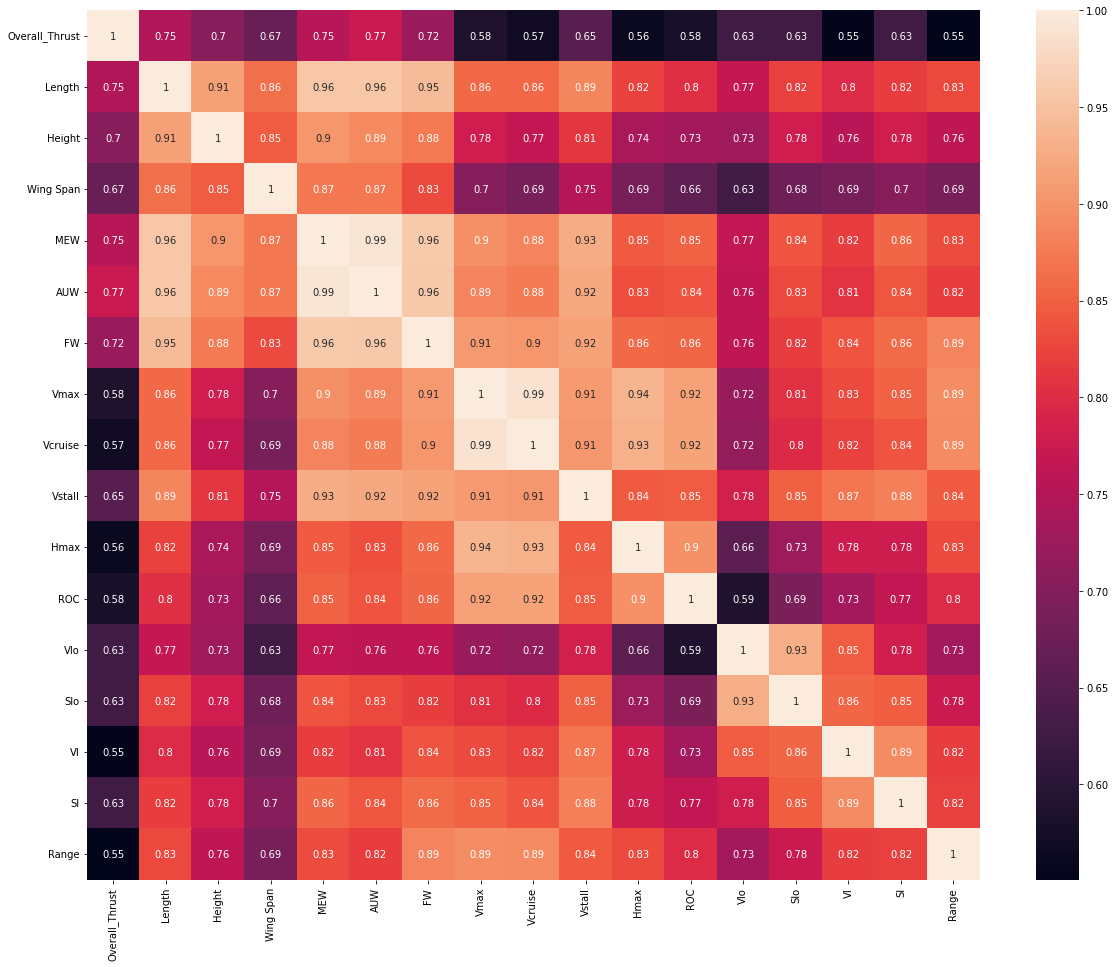

In [69]:
corrmatrix=df_imp.corr(method='spearman')
fig, ax=plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrmatrix),annot=True)
plt.show()

# Histograms

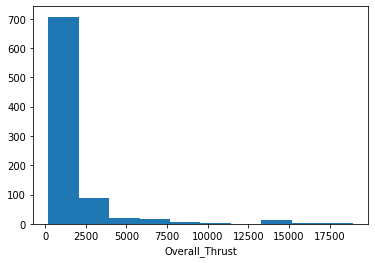

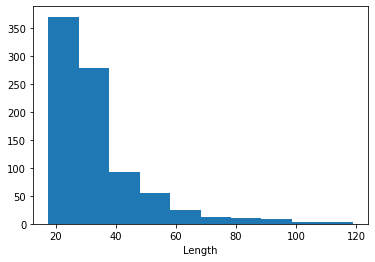

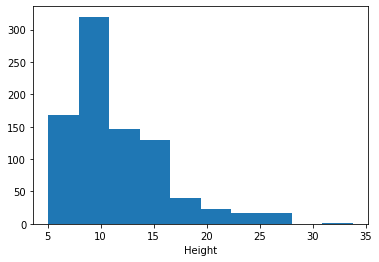

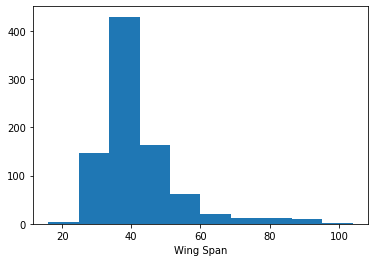

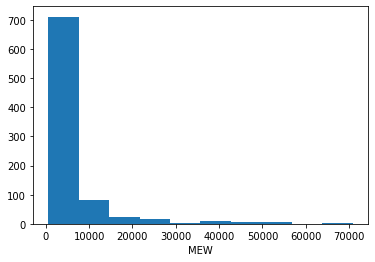

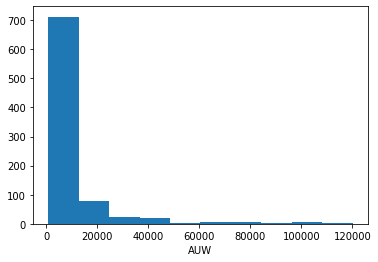

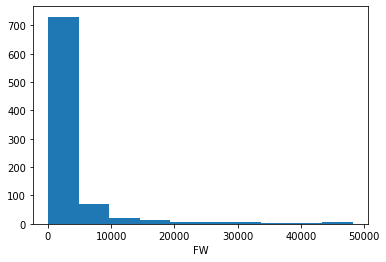

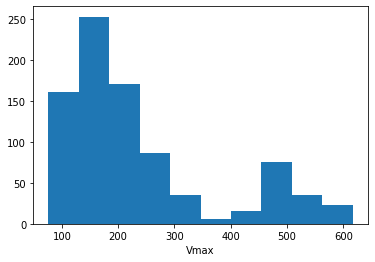

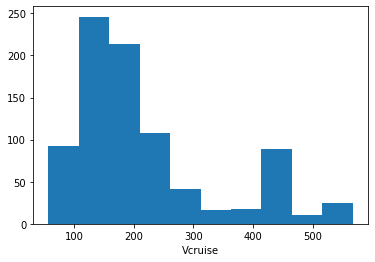

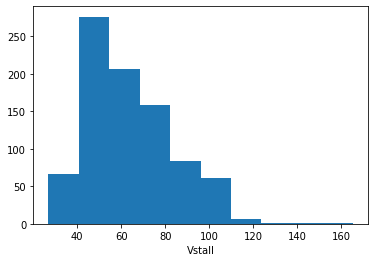

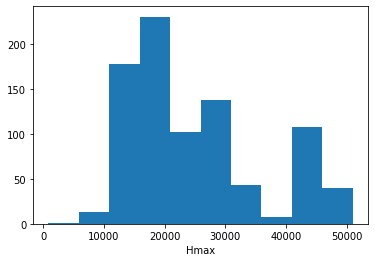

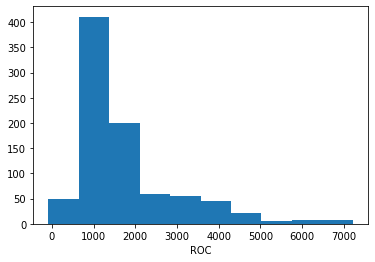

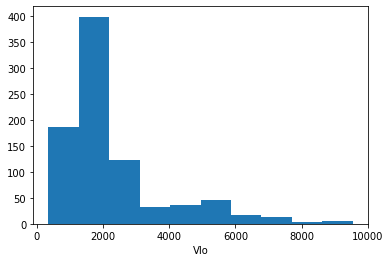

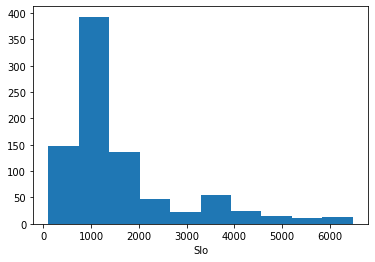

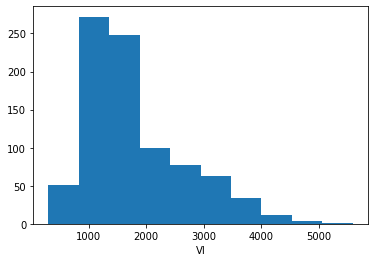

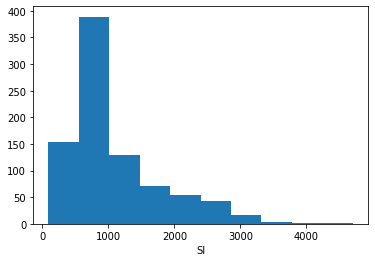

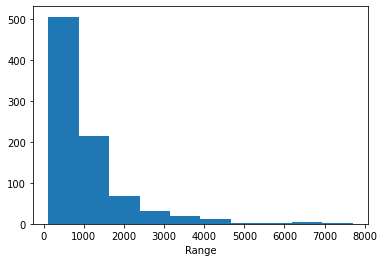

In [70]:
# ploting histograms
for c in df_imp.columns.values:
  if (df_imp[c].dtypes == 'float64') or (df_imp[c].dtypes == 'object'):
    plt.hist(df_imp[c])
    plt.xlabel(c)
    plt.show()

**Observations :**

1. Overall Thurst for most aircrafts lie in a particular region between 0 - 2500 lbs-thr.
2. Similar trends for observed for MEW, AUW, FW. 

In [71]:
# Changing the column names for df_imp

df_imp["Engine_type"] = dataset["Engine Type"]
df_imp["Model"] = dataset["Model"]
df_imp.head()

,Overall_Thrust,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range,Engine_type,Model
0,519.237134,25.250000,10.250000,37.416667,1180.0,2050.0,241.2,104.0,91.0,46.0,13000.0,450.0,900.0,402.130456,1300.0,625.958707,370.0,Piston,15 AC Sedan
1,333.718257,20.583333,8.750000,36.083333,820.0,1350.0,100.5,89.0,83.0,44.0,12300.0,600.0,720.0,306.636262,800.0,304.430117,190.0,Piston,11 CC Super Chief
2,375.999304,21.416667,8.583333,35.000000,810.0,1300.0,127.3,90.0,78.0,37.0,16000.0,650.0,475.0,107.945358,850.0,333.050474,210.0,Piston,7 CCM Champ
3,355.110453,21.416667,8.583333,35.000000,800.0,1300.0,127.3,88.0,78.0,37.0,13000.0,620.0,500.0,138.131447,850.0,337.903785,210.0,Piston,7 DC Champ
4,286.233704,21.416667,8.750000,35.000000,740.0,1220.0,93.8,83.0,74.0,33.0,12500.0,370.0,632.0,219.266210,885.0,338.677201,175.0,Piston,7 AC Champ


In [72]:
# Normalisation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# train_data
s = scaler.fit(df_imp.iloc[:,0:-2])
X = pd.DataFrame(s.transform(df_imp.iloc[:,0:-2]))
X.columns = df_imp.columns.values[0:-2]
Yt= pd.DataFrame(df_imp.iloc[:,-2])
X.head()

,Overall_Thrust,Length,Height,Wing Span,MEW,AUW,FW,Vmax,Vcruise,Vstall,Hmax,ROC,Vlo,Slo,Vl,Sl,Range
0,-0.375174,-0.611483,-0.247965,-0.350065,-0.518465,-0.493999,-0.410509,-0.996544,-1.051687,-0.924772,-1.080241,-1.050298,-0.889762,-0.951001,-0.606314,-0.633908,-0.717952
1,-0.445410,-0.917627,-0.584078,-0.466372,-0.559004,-0.538004,-0.431452,-1.108093,-1.118184,-1.028721,-1.143098,-0.926451,-1.004822,-1.026894,-1.189163,-1.090456,-0.895795
2,-0.429403,-0.862959,-0.621424,-0.560872,-0.560130,-0.541147,-0.427463,-1.100657,-1.159744,-1.392542,-0.810854,-0.885169,-1.161432,-1.184802,-1.130878,-1.049817,-0.876034
3,-0.437311,-0.862959,-0.621424,-0.560872,-0.561256,-0.541147,-0.427463,-1.115530,-1.159744,-1.392542,-1.080241,-0.909938,-1.145451,-1.160812,-1.130878,-1.042925,-0.876034
4,-0.463388,-0.862959,-0.584078,-0.560872,-0.568013,-0.546176,-0.432449,-1.152713,-1.192993,-1.600440,-1.125139,-1.116349,-1.061074,-1.096331,-1.090079,-1.041827,-0.910615


In [73]:
# Converting the output column of strings into integer
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(np.array(Yt))
Y = le.transform(np.array(Yt))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


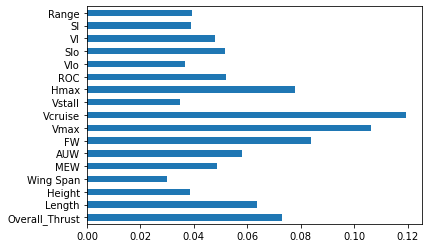

In [74]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
FI = ExtraTreesClassifier()    
FI.fit(X,Y)

f_imp = pd.Series(FI.feature_importances_, index=X.columns)
features = f_imp
features.plot(kind='barh')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [76]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.6886197993726871

In [77]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree = 2)  
X_poly = poly_features.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, random_state=42)

poly_model = LinearRegression()  
poly_model.fit(X_train, Y_train)

pred = poly_model.predict(X_train)
poly_model.score(X_test, Y_test)


0.46994169094314486

**Phase-1 Observations**:

1. Polynomial regression is not able to interpolate the data as most of the data for some columns lying between a fixed region.

2. Linear regression is therefore a better fit comparatively, but still has very less score.

3. So, more algorithms have to be trained and tested and the most appropriate one is to be selected.

In [78]:
# K-fold cross validation
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=3).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.6029374734193544

In [79]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,Y_train)
regr.score(X_test, Y_test)

0.755086279364732

In [80]:
# Mean Absolute Error 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 3.185
